In [1]:
import pandas as pd
df=pd.read_csv("recipes.csv")

In [2]:
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


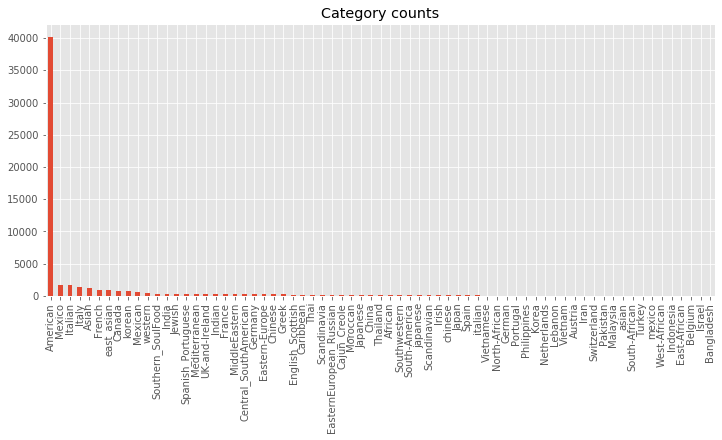

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
df.country.value_counts().plot(kind='bar');
plt.title('Category counts');
